# Task 1

**Creation of a graphical overview of the field experiments and its times of deployment for a selection of measurement instruments.**

Wenfu Sun 2021-07-01

## 1. Load modules

Here I use `python-gantt` to plot the gantt chart. `cairosvg` is used to convert the figure format from `svg` to `png`.

You may use `pip install python-gantt cairosvg` to install them.

In [1]:
import os
import gantt
import cairosvg
import pandas as pd
from IPython.display import SVG
from datetime import datetime as date

## 2. Data preparation

- First, I use `pandas` to load the two `csv` files. 
- Second, the time is converted into `datetime64` object.
- Third, replace the instrument index in `compaigns_info` with the actual instrument name by the `instrument_info`.

In [2]:
# Read 'Tab_1-Instruments.csv' and 'Tab_2-Campaigns.csv' 
instrument_info = pd.read_csv(filepath_or_buffer=os.path.join('Data', '01-Field_experiment_overview', 'Tab_1-Instruments.csv'),
                              sep=';')
campaigns_info  = pd.read_csv(filepath_or_buffer=os.path.join('Data', '01-Field_experiment_overview', 'Tab_2-Campaigns.csv'), 
                              sep=';')

In [3]:
# Convert the format of time from 'day.month.year' to 'year-month-day'
campaigns_info.loc[:,'Start of measurements'] = pd.to_datetime(campaigns_info.loc[:,'Start of measurements'])
campaigns_info.loc[:,'End of measurements'] = pd.to_datetime(campaigns_info.loc[:,'End of measurements'])

# Loop every campaign and convert the instrument information in the 'campaigns_info' from number to instrument name based on the 'instrument_info'
for icomp in campaigns_info.index:
    # Get the instrument number list from 'campaigns_info'
    instrument_num = campaigns_info.loc[icomp]['Instruments (Nos, see Table 1)'].split(',')
    
    # Get the instrument name list from 'instrument_info'
    instrument_name_list = []
    for i_ins in instrument_num:
        instrument_name = instrument_info.loc[instrument_info.loc[:,'No']==int(i_ins)]['Instrument Name'].values[0]
        instrument_name_list.append(instrument_name)
        # Convert the name list to a string
        str_instrument_name_list = ', '.join(map(str, instrument_name_list))
        # Replace the instrument number with the instrument name
        campaigns_info.loc[icomp,'Instruments (Nos, see Table 1)']=str_instrument_name_list

### Here is the processed 'campaigns_info'    

In [4]:
campaigns_info

,Experiment Name,Start of measurements,End of measurements,"Instruments (Nos, see Table 1)"
0,ASKOS,2021-06-25,2022-06-30,"PollyXT_cpv, HALO-Timmy, HATPRO_Kiel"
1,DACAPO-PESO,2018-11-27,2021-07-30,"LACROS-Mira, LACROS-HATPRO, LACROS-Ceilo, LACR..."
2,SO-284 (RV Sonne),2021-06-27,2021-08-17,"OCEANET_Arielle, OCEANET_HATPRO, OCEANET_Parsi..."
3,PS127 (RV Polarstern),2021-11-30,2021-12-31,"OCEANET_Arielle, OCEANET_HATPRO"
4,CLOUDLAB-1,2021-01-12,2022-03-15,"LACROS-Mira, LACROS-HATPRO, LACROS-Ceilo, LACR..."
5,LOSTECCA,2022-01-03,2022-04-15,"LACROS-PollyXT, LACROS-Shaun"
6,Morocco,2022-01-09,2022-09-30,PollyXT_tropos
7,CLOUDLAB-2,2022-01-12,2023-03-15,"LACROS-Mira, LACROS-HATPRO, LACROS-Ceilo, LACR..."
8,COALA,2023-01-01,2024-03-30,"OCEANET_Arielle, OCEANET_HATPRO"


## 3. Create the Gantt chart with `python-gantt`

Note that the gantt chart can be viewed in a **daily**, **weekly**, or **monthly** scale. Here I only show the chart in a monthly scale.

In [5]:
# Get the color list from 'COLORBREWER 2.0'
color_list = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462','#b3de69','#fccde5','#d9d9d9']

# Set the font
gantt.define_font_attributes(fill='black', font_family="Arial")

# Create a project
p = gantt.Project(name='Field experiment name + instrument name')

# Loop every campaign
for i in campaigns_info.index:
    campaign = campaigns_info.loc[i]
    # Create a resource
    r_instrument = gantt.Resource(campaign['Instruments (Nos, see Table 1)'])
    # Create a task
    task = gantt.Task(name=campaign['Experiment Name'], 
                      start=campaign['Start of measurements'], 
                      stop=campaign['End of measurements'], 
                      resources=[r_instrument],
                      color=color_list[i])
    
    # Add the task to the project
    p.add_task(task)
    
# Find the current time
today_time =  date.today()

# Export the Gantt chart in an svg format with a monthly scale
os.makedirs('Results', exist_ok=True)
p.make_svg_for_tasks(filename=os.path.join('Results', 'T01_field_experiments.svg'),
                     today=date(today_time.year, today_time.month, today_time.day), scale='m')

### Preview the Gantt chart

Note that the boxes with different colors represent the 9 campaigns, where the black text indicates the campaign's name and the purple text indicates the instruments used. 

The purple block(s) in the 3rd, 7th, and 9th boxes suggest that the start or end date of the campaign is in the weekends.

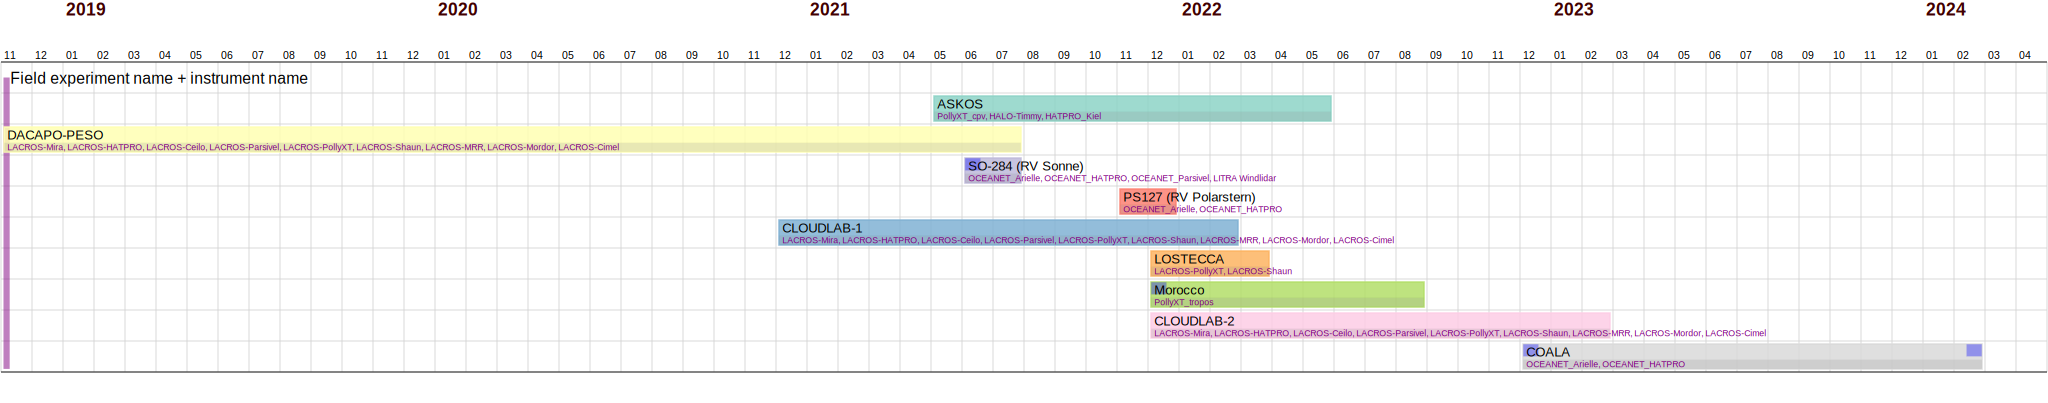

In [6]:
SVG(os.path.join('Results', 'T01_field_experiments.svg'))

## 4. Convert '.svg' to '.png'

In [7]:
cairosvg.svg2png(url=os.path.join('Results', 'T01_field_experiments.svg'), 
                 write_to=os.path.join('Results', 'T01_field_experiments.png'),
                 dpi=300)